In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [66]:
df = pd.read_csv("C:\Guvi\Project\Industrial Copper Modeling\Copper_Set.xlsx - Result 1.csv")
df

C:\Users\winne\AppData\Local\Temp\ipykernel_19104\3794250180.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\Guvi\Project\Industrial Copper Modeling\Copper_Set.xlsx - Result 1.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [67]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [68]:
condition = df['quantity tons'] == 'e'
# Use the condition to drop rows
df.drop(df[condition].index, inplace=True)

In [69]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['quantity tons'] = pd.to_numeric(df['quantity tons'])
df['customer'] = df['customer'].astype(str)
df['country'] = df['country'].astype(str)
df['status'] = df['status'].astype(str)
df['item type'] = df['item type'].astype(str)
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].astype(str)
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [70]:
df.replace('nan', np.nan, inplace=True)

In [71]:
df.drop(['material_ref','id','item_date','delivery date','customer'],axis=1,inplace=True)

In [72]:
df.isnull().sum()

quantity tons     0
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
selling_price     1
dtype: int64

In [77]:
df = df.dropna(subset=[])
#df[['country','status']] = df[['country','status']].fillna(method='bfill')
df[['country','status']].bfill(inplace=True)
df[['thickness','selling_price']] = df[['thickness','selling_price']].fillna(df[['thickness','selling_price']].mean())
df['application'].fillna(df['application'].mode().iloc[0], inplace=True)

C:\Users\winne\AppData\Local\Temp\ipykernel_19104\726437158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country','status']].bfill(inplace=True)


In [78]:
df.isnull().sum()

quantity tons    0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [29]:
df = df.query("status != 'Offerable'")
df = df.query("`item type` != 'SLAWR'")
df = df[df["application"]<=80]

In [30]:
# Calculate the IQR
Q1 = df['thickness'].quantile(0.25)
Q3 = df['thickness'].quantile(0.75)
IQR = Q3 - Q1

# Set a scaling factor (adjust as needed)
k = 1.5

# Define the lower and upper bounds
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Clip the outliers to the bounds
df['thickness'] = df['thickness'].clip(lower=lower_bound, upper=upper_bound)

In [31]:
# Calculate the IQR
Q1 = df['quantity tons'].quantile(0.25)
Q3 = df['quantity tons'].quantile(0.75)
IQR = Q3 - Q1

# Set a scaling factor (adjust as needed)
k = 1.5

# Define the lower and upper bounds
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Clip the outliers to the bounds
df['quantity tons'] = df['quantity tons'].clip(lower=lower_bound, upper=upper_bound)

In [32]:
# Calculate the IQR
Q1 = df['width'].quantile(0.25)
Q3 = df['width'].quantile(0.75)
IQR = Q3 - Q1

# Set a scaling factor (adjust as needed)
k = 1.5

# Define the lower and upper bounds
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Clip the outliers to the bounds
df['width'] = df['width'].clip(lower=lower_bound, upper=upper_bound)

In [33]:
df = df[df["selling_price"]<=20000000]
# Calculate the IQR
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1

# Set a scaling factor (adjust as needed)
k = 1.5

# Define the lower and upper bounds
lower_bound = Q1 - k * IQR
upper_bound = Q3 + k * IQR

# Clip the outliers to the bounds
df['selling_price'] = df['selling_price'].clip(lower=lower_bound, upper=upper_bound)

In [34]:
model = LabelEncoder()
df['status'] = model.fit_transform(df['status'])
df['item type'] = model.fit_transform(df['item type'])

In [35]:
df_price = df.copy()
df_status = df.copy()

In [36]:
df.head(1)

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,28.0,6,4,10.0,2.0,1500.0,1670798778,854.0


# Regression Model

In [79]:
df_price.isnull().sum()

quantity tons    0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [37]:
X = df_price.drop(['selling_price',],axis=1)
y = df_price['selling_price']

SS = StandardScaler()
SS.fit_transform(X)

array([[ 0.10331724, -0.69253773,  0.70944452, ..., -0.13019759,
         0.81483448,  1.66845629],
       [ 2.13089141, -0.8155677 ,  0.70944452, ..., -0.76482446,
        -0.35104084,  1.66553319],
       [ 2.13089141, -0.61051775,  0.70944452, ..., -0.98694387,
        -1.38826785, -0.65959956],
       ...,
       [-0.93601889, -0.8155677 ,  0.70944452, ..., -0.81242148,
        -0.19023045, -0.43167797],
       [-2.55230689, -0.8155677 ,  0.70944452, ..., -0.73838168,
        -0.19023045, -0.43167797],
       [ 2.13089141, -0.8155677 ,  0.70944452, ..., -0.81242148,
        -0.23043305, -0.43167797]])

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

models = [LinearRegression(),KNeighborsRegressor(n_neighbors=3),DecisionTreeRegressor(),RandomForestRegressor(),Lasso(),Ridge()]

for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print("*****",model,"*****")
    print("*****MSE*****")
    print(f"Train error: {math.sqrt(mean_squared_error(y_train,train_pred))}")
    print(f"Test error: {math.sqrt(mean_squared_error(y_test,test_pred))}")
    print("*****R2*****")
    print(f"Train R squared value: {(r2_score(y_train,train_pred))}")
    print(f"Test R squared value: {(r2_score(y_test,test_pred))}")
    
    print("\n")

***** LinearRegression() *****
*****MSE*****
Train error: 192.7232383276437
Test error: 193.10964807443094
*****R2*****
Train R squared value: 0.14889241660257857
Test R squared value: 0.14846435137333458


***** KNeighborsRegressor(n_neighbors=3) *****
*****MSE*****
Train error: 106.79337892729707
Test error: 152.83564225548244
*****R2*****
Train R squared value: 0.7386605657501262
Test R squared value: 0.4666108443130178


***** DecisionTreeRegressor() *****
*****MSE*****
Train error: 26.306624965311123
Test error: 159.4474336561674
*****R2*****
Train R squared value: 0.9841420677549303
Test R squared value: 0.4194629305079437


***** RandomForestRegressor() *****
*****MSE*****
Train error: 51.562772992843755
Test error: 124.15236396840348
*****R2*****
Train R squared value: 0.9390759421896502
Test R squared value: 0.6480306259527563


***** Lasso() *****
*****MSE*****
Train error: 192.73274204620284
Test error: 193.11652136745744
*****R2*****
Train R squared value: 0.148808473571689

c:\Users\winne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.34143e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Test

In [63]:
X.head(1)

,quantity tons,country,status,item type,application,thickness,width,product_ref
0,54.151139,28.0,6,4,10.0,2.0,1500.0,1670798778


In [81]:
PR = X['product_ref'].unique()
W_MAX = X.width.max()
W_MIN = X.width.min()
T_MIN = X.thickness.min()
T_MAX = X.thickness.max()
A = X.application.unique()
IT = X['item type'].unique()
S = X['status'].unique()
C = X['country'].unique()
QT_MIN = X['quantity tons'].min()
QT_MAX = X['quantity tons'].max()

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Choose the best model (RandomForestRegressor in this case)
best_model = RandomForestRegressor()

# Train the best model on the entire training dataset
best_model.fit(x_train, y_train)

# Now, you can input new values for prediction
new_input = [[91,25,6,3,59,1.2,1420,628377]]  # ['quantity tons','country','status','item type','application','thickness','width','product_ref']

# Make predictions using the best model
prediction = best_model.predict(new_input)

# Print the predicted result
print("Predicted Result:", *prediction)

Predicted Result: 772.8671999999999


c:\Users\winne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Classification Model

In [ ]:
df_status['quantity tons'] = np.log(df_status['quantity tons'])
df_status['application'] = np.log(df_status['application'])
df_status['thickness'] = np.log(df_status['thickness'])
df_status['width'] = np.log(df_status['width'])
df_status['selling_price'] = np.log(df_status['selling_price'])
df_status = df_status.dropna(subset=['quantity tons'])

c:\Users\winne\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [80]:
df_status.head(1)

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,28.0,6,4,10.0,2.0,1500.0,1670798778,854.0


In [85]:
X = df_status.drop(['status'],axis=1)
y = df_status['status']
df_status.status.unique()

array([6, 0, 5, 1, 2, 7, 4, 3])

In [84]:
pr = X['product_ref'].unique()
w_max = X.width.max()
w_min = X.width.min()
t_min = X.thickness.min()
t_max = X.thickness.max()
a = X.application.unique()
it = X['item type'].unique()
sp_min = X.selling_price.min()
sp_max = X.selling_price.max()
c = X['country'].unique()
qt_min = X['quantity tons'].min()
qt_max = X['quantity tons'].max()

In [ ]:
X = df_status.drop(['status'],axis=1)
y = df_status['status']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier()]

for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print("*****",model,"*****")
    print("*****Train*****")
    print(f"Training Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Training Precision: {precision_score(y_train,train_pred,average='micro')}")
    print(f"Training Recall: {recall_score(y_train,train_pred,average='micro')}")
    print(f"Training F1 Score: {f1_score(y_train,train_pred,average='micro')}")
    print("*****Test*****")
    print(f"Test Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Test Precision: {precision_score(y_test,test_pred,average='micro')}")
    print(f"Test Recall: {recall_score(y_test,test_pred,average='micro')}")
    print(f"Test F1 Score: {f1_score(y_test,test_pred,average='micro')}")
    print("\n")

***** LogisticRegression() *****
*****Train*****
Training Accuracy: 0.6388915124039793
Training Precision: 0.6388915124039793
Training Recall: 0.6388915124039793
Training F1 Score: 0.6388915124039793
*****Test*****
Test Accuracy: 0.6384955833471067
Test Precision: 0.6384955833471067
Test Recall: 0.6384955833471067
Test F1 Score: 0.6384955833471067


***** DecisionTreeClassifier() *****
*****Train*****
Training Accuracy: 0.9994648029215464
Training Precision: 0.9994648029215464
Training Recall: 0.9994648029215464
Training F1 Score: 0.9994648029215464
*****Test*****
Test Accuracy: 0.7773309092244688
Test Precision: 0.7773309092244688
Test Recall: 0.7773309092244688
Test F1 Score: 0.7773309092244687


***** KNeighborsClassifier() *****
*****Train*****
Training Accuracy: 0.8431085505603828
Training Precision: 0.8431085505603828
Training Recall: 0.8431085505603828
Training F1 Score: 0.8431085505603828
*****Test*****
Test Accuracy: 0.7703707784695059
Test Precision: 0.7703707784695059
Test R

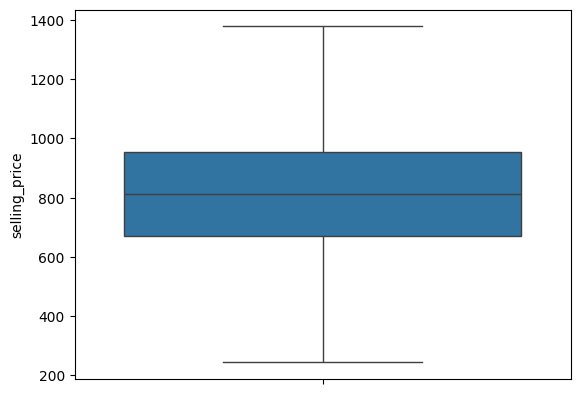

In [166]:
sns.boxplot(df_price,y="selling_price")
plt.show()